In [96]:
%config InlineBackend.figure_format = 'svg' 
# 如果要保存svg格式图片，可以用上面的命令

### 下面这个是phiTrans的similarity embedding的可视化，包括heatmap图

In [99]:
import os
import seaborn as sns
import scanpy as sc
import matplotlib.pyplot as plt
import pandas as pd


root_path = "/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status"
# exp_name = "new_PhiTrans_sim_tile5ktwice500_selfqueryparam_uniform"
# exp_name = "new_PhiTrans_sim_tile5ktwice500_query_uniformx4"
# exp_name = "new_ProtoMIL_sim_Cosine_mean_tile5ktwice500_0insteval"
exp_name = "new_PhiTrans_align_sim_tile5ktwice500"
# exp_name = "new_ProtoMIL_sim_Cosine_mean_tile5ktwice500_0insteval"
tidx = 0
eval_res = pd.read_csv(os.path.join(root_path, exp_name, f"time{tidx}/eval_HEROHE_test_res.csv"))
eval_res

,Unnamed: 0,slide_id,prob_neg,prob_pos,pred,label,sim0,sim1,sim2,sim3,...,sim15,sim16,sim17,sim18,sim19,sim20,sim21,sim22,sim23,sim24
0,0,70,0.384893,0.615107,1,1,0.026785,0.004730,0.029232,0.031903,...,0.007101,0.010095,0.005920,0.030423,0.019750,0.022828,0.046522,0.007050,0.028370,0.033942
1,1,71,0.677291,0.322709,0,1,-0.066908,-0.012266,-0.073360,-0.080154,...,-0.018323,-0.025657,-0.015206,-0.076427,-0.049782,-0.057221,-0.116418,-0.018282,-0.071315,-0.085581
2,2,72,0.133482,0.866518,1,1,0.150918,0.027384,0.165243,0.180509,...,0.040968,0.057601,0.034041,0.172122,0.112011,0.128945,0.262462,0.040822,0.160547,0.192498
3,3,73,0.826358,0.173642,0,1,-0.176832,-0.032181,-0.193685,-0.211605,...,-0.048127,-0.067587,-0.039977,-0.201770,-0.131341,-0.151123,-0.307574,-0.047978,-0.188199,-0.225707
4,4,74,0.505539,0.494461,0,1,-0.008362,-0.001673,-0.009275,-0.010163,...,-0.002472,-0.003344,-0.002030,-0.009688,-0.006362,-0.007214,-0.014616,-0.002495,-0.009052,-0.010943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,145,347,0.761403,0.238597,0,1,-0.116561,-0.021265,-0.127703,-0.139531,...,-0.031793,-0.044601,-0.026401,-0.133047,-0.086624,-0.099634,-0.202762,-0.031703,-0.124099,-0.148862
146,146,348,0.212880,0.787120,1,1,0.093119,0.016921,0.101986,0.111400,...,0.025307,0.035561,0.021023,0.106223,0.069135,0.079581,0.161955,0.025220,0.099106,0.118847
147,147,349,0.493007,0.506993,1,1,-0.004723,-0.000895,-0.005189,-0.005690,...,-0.001335,-0.001843,-0.001105,-0.005425,-0.003545,-0.004043,-0.008230,-0.001340,-0.005040,-0.006062
148,148,350,0.130271,0.869729,1,1,0.153955,0.028005,0.168626,0.184212,...,0.041881,0.058826,0.034789,0.175651,0.114333,0.131577,0.267776,0.041746,0.163858,0.196510


/tmp/ipykernel_490729/2688707968.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data, x='x', y='value', palette="flare")


<Axes: xlabel='x', ylabel='value'>

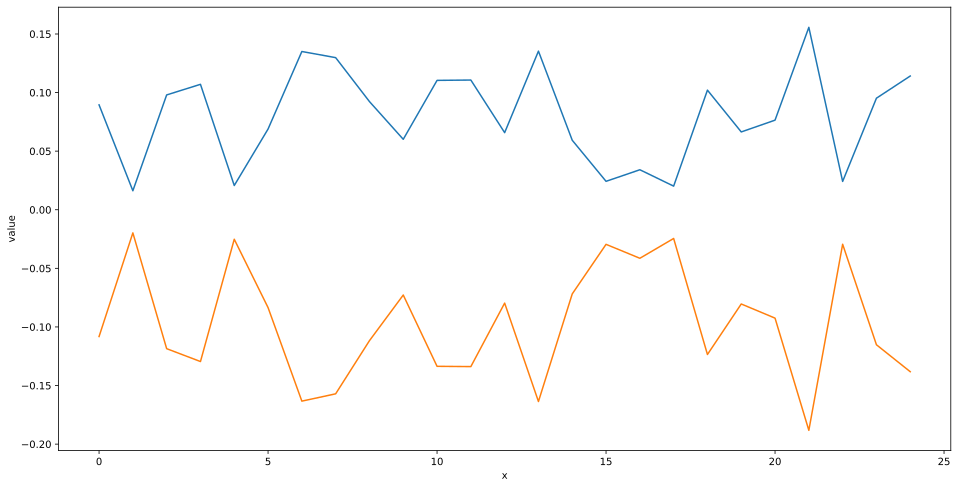

In [100]:
columns = [f"sample{i}" for i in eval_res['slide_id']]
sns.set_context({"figure.figsize":(16,8)})

prototype_sim_len = eval_res.shape[1]-6

data = pd.DataFrame(eval_res[eval_res.pred == 1].iloc[:, 6:])
# data.rename(columns=dict(columns))

data = pd.DataFrame(data.mean(), columns=['value'])
data.insert(loc=0, column='x', value=list(range(prototype_sim_len)))
data
sns.lineplot(data=data, x='x', y='value', palette="flare")

data = pd.DataFrame(eval_res[eval_res.pred == 0].iloc[:, 6:])

data = pd.DataFrame(data.mean(), columns=['value'])
data.insert(loc=0, column='x', value=list(range(prototype_sim_len)))
data
sns.lineplot(data=data, x='x', y='value')
# sns.histplot(eval_res[eval_res.pred == 1].iloc[:, 6:])

/home/cyyan/anaconda3/envs/torch20/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


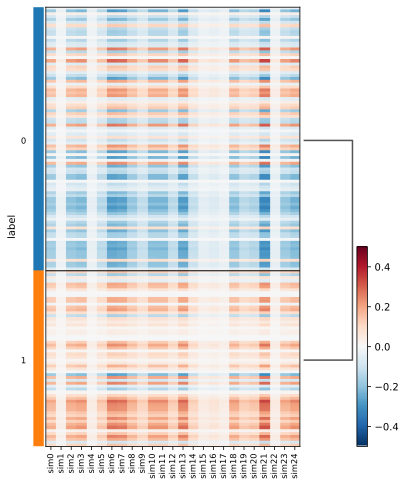

In [102]:
eval_res["label"] = pd.Categorical(eval_res["label"])
eval_res["pred"] = pd.Categorical(eval_res["pred"])

adata = sc.AnnData(eval_res.iloc[:, 6:], obs=pd.DataFrame(eval_res.iloc[:, 1:6]))

# pred = eval_res.iloc[:, 4]

adata

ax = sc.pl.heatmap(adata, adata.var_names, groupby='label', layer=None, standard_scale=None,
                   vmin=-0.5, vmax=0.5, cmap='RdBu_r', dendrogram=True, swap_axes=False, figsize=(6, 8))


min value: -0.33667827
max value: -0.0014476869


<Axes: >

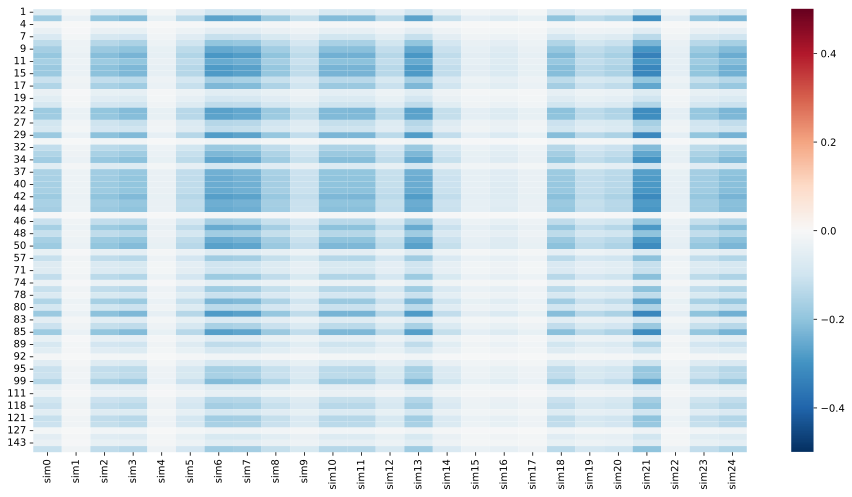

In [103]:
sns.set_context({"figure.figsize":(16,8)})
neg_embedding  = eval_res[eval_res.pred == 0].iloc[:, 6:]
print(f"min value: {neg_embedding.min().min()}")
print(f"max value: {neg_embedding.max().max()}")

sns.heatmap(data=neg_embedding,square=False, cmap="RdBu_r", vmax=0.5, vmin=-0.5) 

min value: -0.004674105
max value: 0.32334098


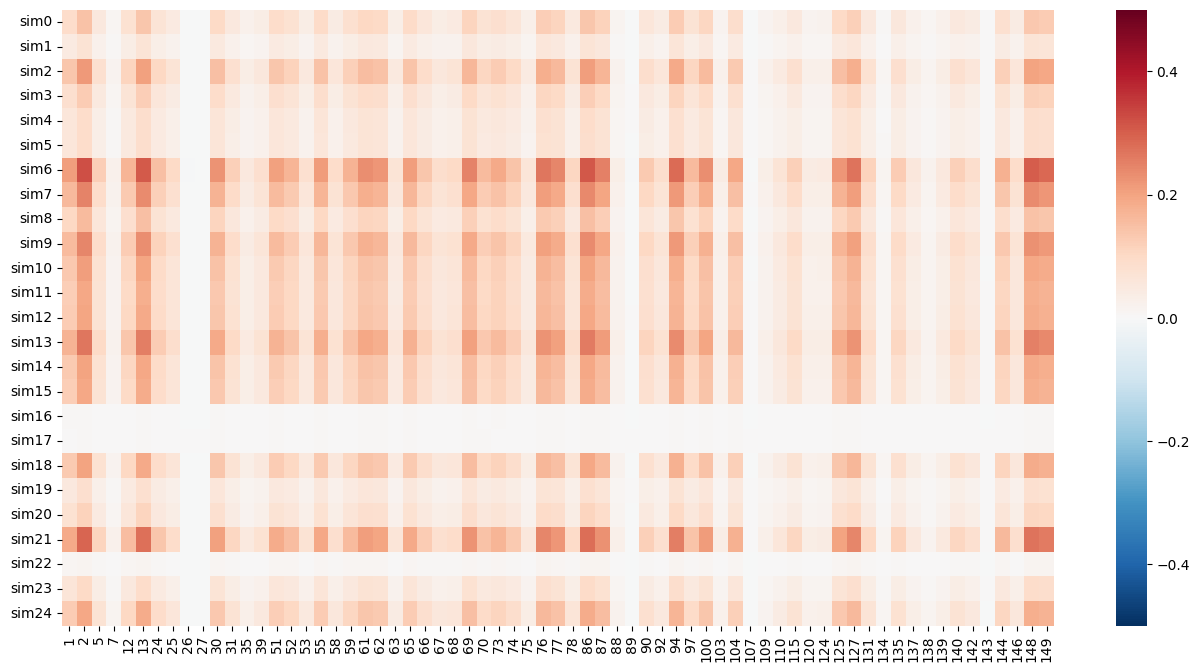

In [108]:
sns.set_context({"figure.figsize":(16,8)})
pos_embedding  = eval_res[eval_res.pred == 1].iloc[:, 6:].transpose()
print(f"min value: {pos_embedding.min().min()}")
print(f"max value: {pos_embedding.max().max()}")

sns.heatmap(data=pos_embedding,square=False, cmap="RdBu_r", vmax=0.5, vmin=-0.5) 

plt.show()

In [110]:
import os
import seaborn as sns
import scanpy as sc
import matplotlib.pyplot as plt
import pandas as pd


root_path = "/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status"
# exp_name = "new_PhiTrans_sim_tile5ktwice500_selfqueryparam_uniform"
# exp_name = "new_PhiTrans_sim_tile5ktwice500_query_uniformx4"
exp_name = "new_ProtoMIL_sim_Cosine_mean_tile5ktwice500_0insteval"
# exp_name = "new_PhiTrans_align_sim_tile5ktwice500"
# exp_name = "new_ProtoMIL_sim_Cosine_mean_tile5ktwice500_0insteval"
tidx = 0
eval_res = pd.read_csv(os.path.join(root_path, exp_name, f"time{tidx}/eval_HEROHE_test_res.csv"))
eval_res

,Unnamed: 0,slide_id,prob_neg,prob_pos,pred,label,sim0,sim1,sim2,sim3,...,sim15,sim16,sim17,sim18,sim19,sim20,sim21,sim22,sim23,sim24
0,0,70,0.401219,0.598781,1,1,0.108859,0.113942,0.095402,0.065330,...,0.092203,0.054366,0.076528,0.056309,0.102590,0.023536,0.067841,0.088884,0.075787,0.134344
1,1,71,0.508453,0.491547,0,1,0.074886,0.097286,0.088819,0.081393,...,0.091506,0.071885,0.092592,0.084356,0.099803,0.028309,0.093344,0.092787,0.065521,0.090653
2,2,72,0.167593,0.832407,1,1,0.233492,0.137562,0.081353,-0.030571,...,0.054558,-0.027614,-0.008051,-0.075901,0.076503,-0.002386,-0.042852,0.033031,0.084327,0.247851
3,3,73,0.794080,0.205920,0,1,-0.083726,0.043160,0.074342,0.143527,...,0.095779,0.122861,0.136339,0.180067,0.086875,0.043736,0.166419,0.113342,0.034790,-0.046752
4,4,74,0.534331,0.465669,0,1,0.062572,0.098815,0.092240,0.090026,...,0.095358,0.077454,0.097530,0.093903,0.102039,0.030475,0.102257,0.098765,0.066458,0.084996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,145,347,0.780360,0.219640,0,1,-0.075156,0.049500,0.075083,0.145167,...,0.094877,0.115780,0.132257,0.172211,0.087145,0.040984,0.156917,0.114833,0.038122,-0.039733
146,146,348,0.175581,0.824419,1,1,0.237694,0.141469,0.086706,-0.019470,...,0.061387,-0.011865,0.010274,-0.057163,0.089970,0.001916,-0.023390,0.040840,0.085909,0.242214
147,147,349,0.375352,0.624648,1,1,0.122041,0.126061,0.102392,0.064058,...,0.094503,0.055723,0.080544,0.055370,0.112963,0.023540,0.068886,0.089756,0.080219,0.149265
148,148,350,0.177296,0.822704,1,1,0.230742,0.141062,0.086915,-0.017118,...,0.063256,-0.011762,0.010966,-0.054772,0.090175,0.002244,-0.024500,0.042151,0.086398,0.241102


/tmp/ipykernel_490729/2688707968.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data, x='x', y='value', palette="flare")


<Axes: xlabel='x', ylabel='value'>

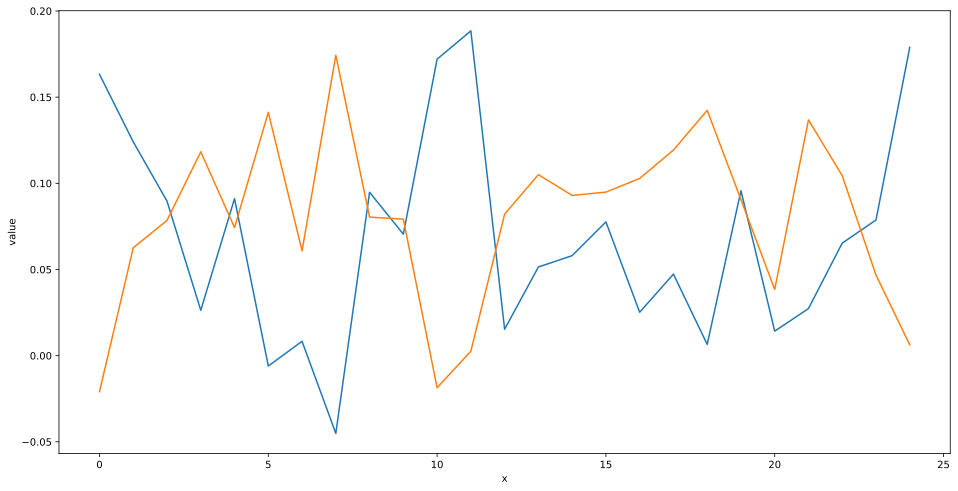

In [106]:
columns = [f"sample{i}" for i in eval_res['slide_id']]
sns.set_context({"figure.figsize":(16,8)})

prototype_sim_len = eval_res.shape[1]-6

data = pd.DataFrame(eval_res[eval_res.pred == 1].iloc[:, 6:])
# data.rename(columns=dict(columns))

data = pd.DataFrame(data.mean(), columns=['value'])
data.insert(loc=0, column='x', value=list(range(prototype_sim_len)))
data
sns.lineplot(data=data, x='x', y='value', palette="flare")

data = pd.DataFrame(eval_res[eval_res.pred == 0].iloc[:, 6:])

data = pd.DataFrame(data.mean(), columns=['value'])
data.insert(loc=0, column='x', value=list(range(prototype_sim_len)))
data
sns.lineplot(data=data, x='x', y='value')
# sns.histplot(eval_res[eval_res.pred == 1].iloc[:, 6:])

/home/cyyan/anaconda3/envs/torch20/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


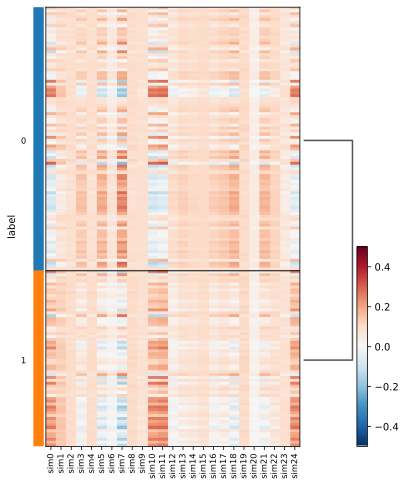

In [111]:
eval_res["label"] = pd.Categorical(eval_res["label"])
eval_res["pred"] = pd.Categorical(eval_res["pred"])

adata = sc.AnnData(eval_res.iloc[:, 6:], obs=pd.DataFrame(eval_res.iloc[:, 1:6]))

# pred = eval_res.iloc[:, 4]

adata

ax = sc.pl.heatmap(adata, adata.var_names, groupby='label', layer=None, standard_scale=None,
                   vmin=-0.5, vmax=0.5, cmap='RdBu_r', dendrogram=True, swap_axes=False, figsize=(6, 8))


### 下面这个实验结果是随机初始化prototype作为query，在测试集上预测similarity可视化

In [148]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


root_path = "/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status"
exp_name = "new_PhiTrans_sim_tile5ktwice500_selfqueryparam_uniform"
# exp_name = "new_PhiTrans_sim_tile5ktwice500_query_uniformx4"
# exp_name = "new_PhiTrans_align_sim_tile5k_1abmil0sel"
# exp_name = "new_PhiTrans_align_sim_tile5ktwice500"
# exp_name = "new_ProtoMIL_sim_Cosine_mean_tile5ktwice500_0insteval"
tidx = 0
eval_res = pd.read_csv(os.path.join(root_path, exp_name, f"time{tidx}/eval_HEROHE_test_res.csv"))
eval_res

,Unnamed: 0,slide_id,prob_neg,prob_pos,pred,label,sim0,sim1,sim2,sim3,...,sim15,sim16,sim17,sim18,sim19,sim20,sim21,sim22,sim23,sim24
0,0,70,0.631240,0.368760,0,1,0.039949,-0.042370,0.035660,0.015650,...,-0.023256,-0.026905,-0.018176,-0.000549,0.002154,0.047340,-0.052281,0.031427,-0.019924,-0.044607
1,1,71,0.103442,0.896558,1,1,-0.196034,0.207635,-0.172131,-0.077252,...,0.114007,0.132323,0.089444,0.002443,-0.010200,-0.226397,0.251915,-0.152414,0.097500,0.217761
2,2,72,0.080875,0.919125,1,1,-0.230735,0.244399,-0.202557,-0.090927,...,0.134181,0.155746,0.105276,0.002874,-0.012011,-0.266377,0.296409,-0.179376,0.114753,0.256311
3,3,73,0.865181,0.134819,0,1,0.201264,-0.213236,0.177232,0.079226,...,-0.117061,-0.135793,-0.091777,-0.002555,0.010548,0.233479,-0.259462,0.156809,-0.100146,-0.223789
4,4,74,0.517819,0.482181,0,1,0.005392,-0.005757,0.005155,0.002056,...,-0.003142,-0.003584,-0.002411,-0.000105,0.000341,0.007083,-0.007669,0.004460,-0.002717,-0.006162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,145,347,0.678393,0.321607,0,1,0.058860,-0.062406,0.052229,0.023104,...,-0.034238,-0.039657,-0.026791,-0.000783,0.003143,0.069087,-0.076596,0.046112,-0.029320,-0.065612
146,146,348,0.131542,0.868458,1,1,-0.161617,0.171163,-0.141613,-0.063732,...,0.093976,0.109120,0.073764,0.001989,-0.008379,-0.186029,0.207178,-0.125475,0.080353,0.179426
147,147,349,0.431809,0.568191,1,1,-0.019264,0.020355,-0.016464,-0.007665,...,0.011199,0.013066,0.008845,0.000199,-0.000937,-0.021333,0.023937,-0.014691,0.009544,0.021214
148,148,350,0.125942,0.874058,1,1,-0.167863,0.177787,-0.147177,-0.066180,...,0.097610,0.113325,0.076604,0.002074,-0.008716,-0.193406,0.215345,-0.130382,0.083466,0.186397


/tmp/ipykernel_490729/2067677525.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data, x='x', y='value', palette="flare")


<Axes: xlabel='x', ylabel='value'>

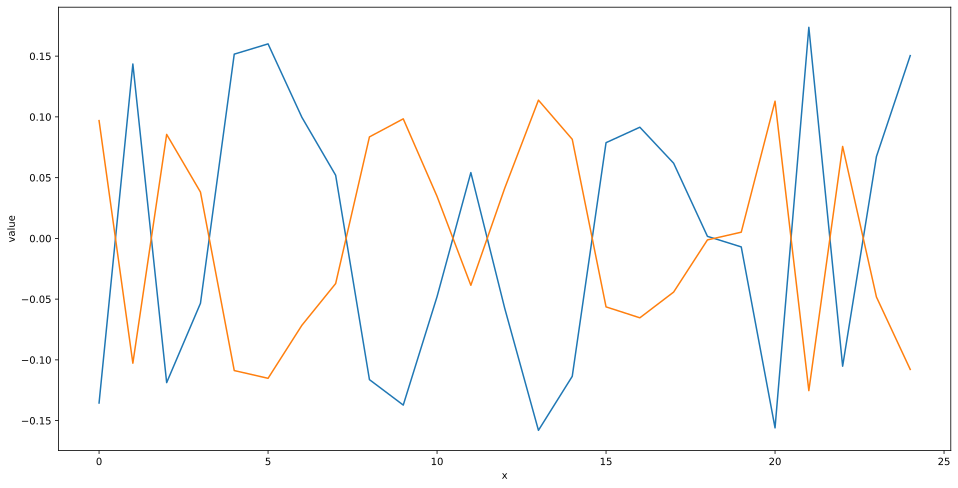

In [149]:
columns = [f"sample{i}" for i in eval_res['slide_id']]
sns.set_context({"figure.figsize":(16,8)})

prototype_sim_len = eval_res.shape[1]-6

data = pd.DataFrame(eval_res[eval_res.pred == 1].iloc[:, 6:])
# data.rename(columns=dict(columns))

data = pd.DataFrame(data.mean(), columns=['value'])
data.insert(loc=0, column='x', value=list(range(prototype_sim_len)))
data
sns.lineplot(data=data, x='x', y='value', palette="flare")

data = pd.DataFrame(eval_res[eval_res.pred == 0].iloc[:, 6:])

data = pd.DataFrame(data.mean(), columns=['value'])
data.insert(loc=0, column='x', value=list(range(prototype_sim_len)))

sns.lineplot(data=data, x='x', y='value')
# sns.histplot(eval_res[eval_res.pred == 1].iloc[:, 6:])

0.30004877
-0.27365407


/home/cyyan/anaconda3/envs/torch20/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


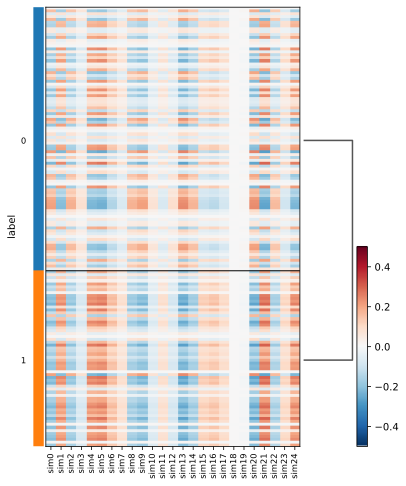

In [150]:
eval_res["label"] = pd.Categorical(eval_res["label"])
eval_res["pred"] = pd.Categorical(eval_res["pred"])

adata = sc.AnnData(eval_res.iloc[:, 6:], obs=pd.DataFrame(eval_res.iloc[:, 1:6]))

# pred = eval_res.iloc[:, 4]

print(adata.X.max())
print(adata.X.min())

ax = sc.pl.heatmap(adata, adata.var_names, groupby='label', layer=None, standard_scale=None,
                   vmin=-0.5, vmax=0.5, cmap='RdBu_r', dendrogram=True, swap_axes=False, figsize=(6, 8))


min value: -0.27365407
max value: 0.24861006


<Axes: >

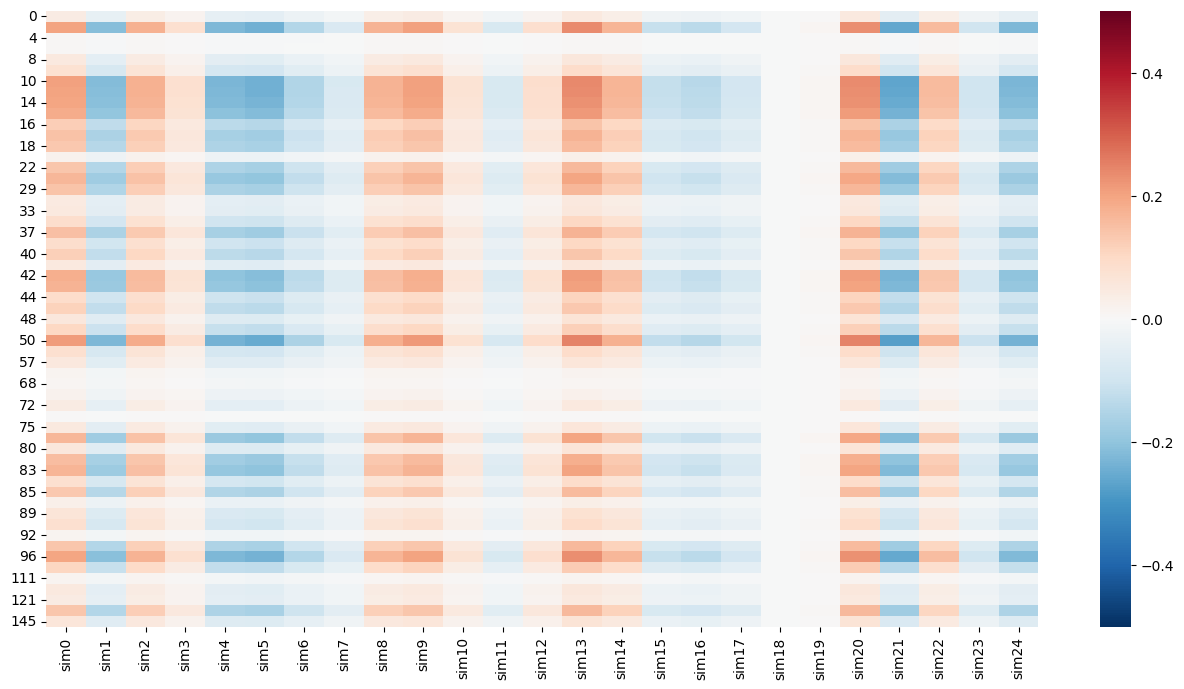

In [70]:
sns.set_context({"figure.figsize":(16,8)})
neg_embedding  = eval_res[eval_res.pred == 0].iloc[:, 6:]
print(f"min value: {neg_embedding.min().min()}")
print(f"max value: {neg_embedding.max().max()}")

sns.heatmap(data=neg_embedding,square=False, cmap="RdBu_r", vmax=0.5, vmin=-0.5) 

min value: -0.2727757
max value: 0.30004877


<Axes: >

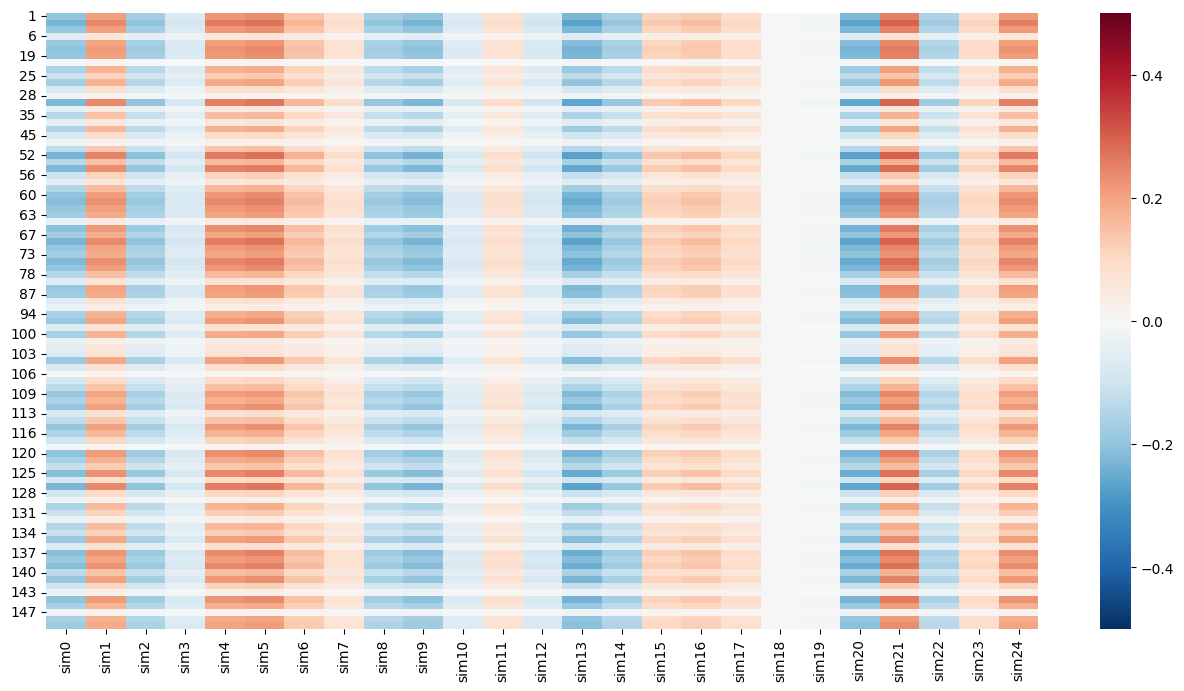

In [71]:
sns.set_context({"figure.figsize":(16,8)})
pos_embedding  = eval_res[eval_res.pred == 1].iloc[:, 6:]
print(f"min value: {pos_embedding.min().min()}")
print(f"max value: {pos_embedding.max().max()}")

sns.heatmap(data=pos_embedding,square=False, cmap="RdBu_r", vmax=0.5, vmin=-0.5) 

### 下面这个是new_ABMIL的最后cls_token特征拿出来，进行分析

In [151]:
exp_name = "new_ABMIL"

tidx = 0
eval_res = pd.read_csv(os.path.join(root_path, exp_name, f"time{tidx}/eval_HEROHE_test_res.csv"))
eval_res

,Unnamed: 0,slide_id,prob_neg,prob_pos,pred,label,sim0,sim1,sim2,sim3,...,sim246,sim247,sim248,sim249,sim250,sim251,sim252,sim253,sim254,sim255
0,0,70,0.374486,0.625514,1,1,0.001768,0.040778,0.115696,0.000000,...,0.009356,0.011516,0.030217,0.000000,0.0,0.0,0.139480,0.014454,0.014922,0.005699
1,1,71,0.527084,0.472916,0,1,0.003165,0.024093,0.070802,0.000000,...,0.012658,0.019230,0.017445,0.000000,0.0,0.0,0.087064,0.022021,0.021604,0.009195
2,2,72,0.171038,0.828962,1,1,0.000000,0.066767,0.190329,0.000567,...,0.004238,0.000000,0.049746,0.000839,0.0,0.0,0.235630,0.000000,0.000000,0.000000
3,3,73,0.716128,0.283872,0,1,0.007405,0.007558,0.023787,0.000000,...,0.018474,0.030086,0.004160,0.000000,0.0,0.0,0.029435,0.034648,0.032629,0.016747
4,4,74,0.686922,0.313078,0,1,0.007166,0.010195,0.032600,0.000000,...,0.017985,0.028030,0.005173,0.000000,0.0,0.0,0.041999,0.032176,0.031277,0.016351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,145,347,0.387824,0.612176,1,1,0.000452,0.038400,0.108527,0.000159,...,0.007668,0.012255,0.028459,0.000000,0.0,0.0,0.132262,0.017133,0.015325,0.005009
146,146,348,0.339088,0.660912,1,1,0.000418,0.040999,0.112243,0.000000,...,0.006066,0.008633,0.029624,0.000000,0.0,0.0,0.139369,0.008969,0.010585,0.003547
147,147,349,0.556978,0.443022,0,1,0.003927,0.023017,0.063707,0.000000,...,0.012536,0.020594,0.015569,0.000000,0.0,0.0,0.081088,0.025145,0.023882,0.010893
148,148,350,0.317367,0.682633,1,1,0.000266,0.044789,0.120707,0.000000,...,0.005682,0.007274,0.031947,0.000000,0.0,0.0,0.150618,0.008718,0.010021,0.003366


/tmp/ipykernel_490729/2688707968.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data, x='x', y='value', palette="flare")


<Axes: xlabel='x', ylabel='value'>

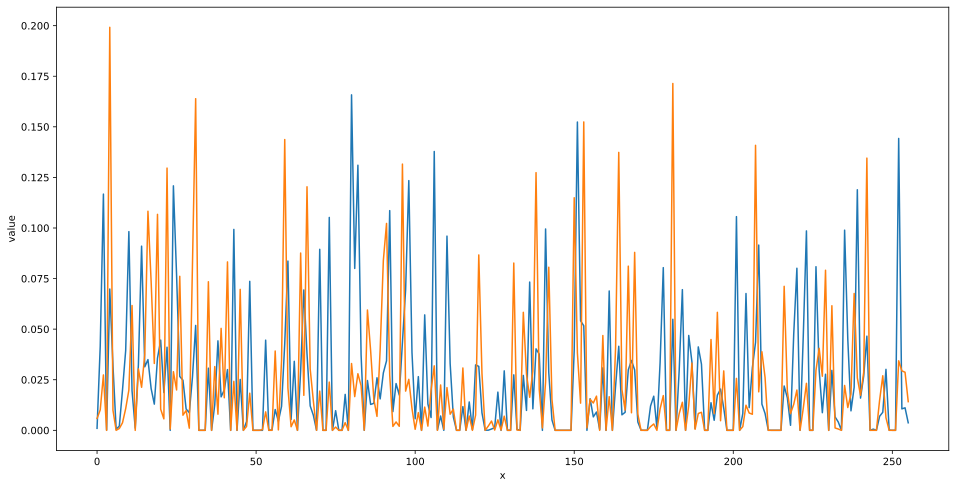

In [152]:
columns = [f"sample{i}" for i in eval_res['slide_id']]
sns.set_context({"figure.figsize":(16,8)})

prototype_sim_len = eval_res.shape[1]-6

data = pd.DataFrame(eval_res[eval_res.pred == 1].iloc[:, 6:])
# data.rename(columns=dict(columns))

data = pd.DataFrame(data.mean(), columns=['value'])
data.insert(loc=0, column='x', value=list(range(prototype_sim_len)))
data
sns.lineplot(data=data, x='x', y='value', palette="flare")

data = pd.DataFrame(eval_res[eval_res.pred == 0].iloc[:, 6:])

data = pd.DataFrame(data.mean(), columns=['value'])
data.insert(loc=0, column='x', value=list(range(prototype_sim_len)))
data
sns.lineplot(data=data, x='x', y='value')
# sns.histplot(eval_res[eval_res.pred == 1].iloc[:, 6:])

0.31484503
0.0
         Falling back to preprocessing with `sc.pp.pca` and default params.


/home/cyyan/anaconda3/envs/torch20/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


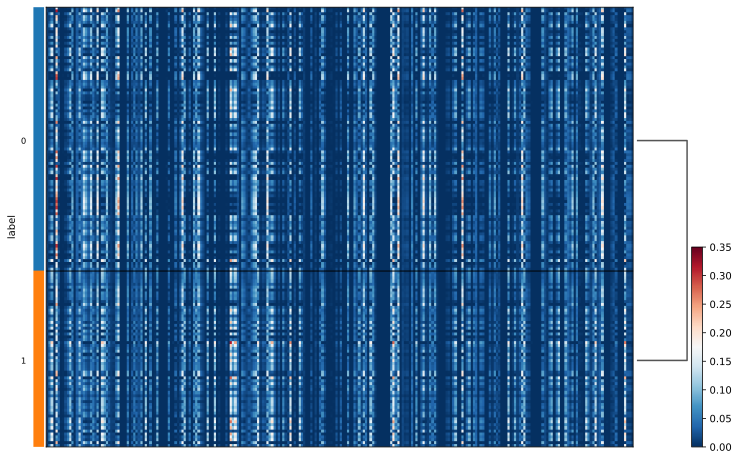

In [153]:
eval_res["label"] = pd.Categorical(eval_res["label"])
eval_res["pred"] = pd.Categorical(eval_res["pred"])

adata = sc.AnnData(eval_res.iloc[:, 6:], obs=pd.DataFrame(eval_res.iloc[:, 1:6]))

# pred = eval_res.iloc[:, 4]

print(adata.X.max())
print(adata.X.min())

ax = sc.pl.heatmap(adata, adata.var_names, groupby='label', layer=None, standard_scale=None,
                   vmin=0., vmax=0.35, cmap='RdBu_r', dendrogram=True, swap_axes=False, figsize=(12, 8))


min value: 0.0
max value: 0.3138802


<Axes: >

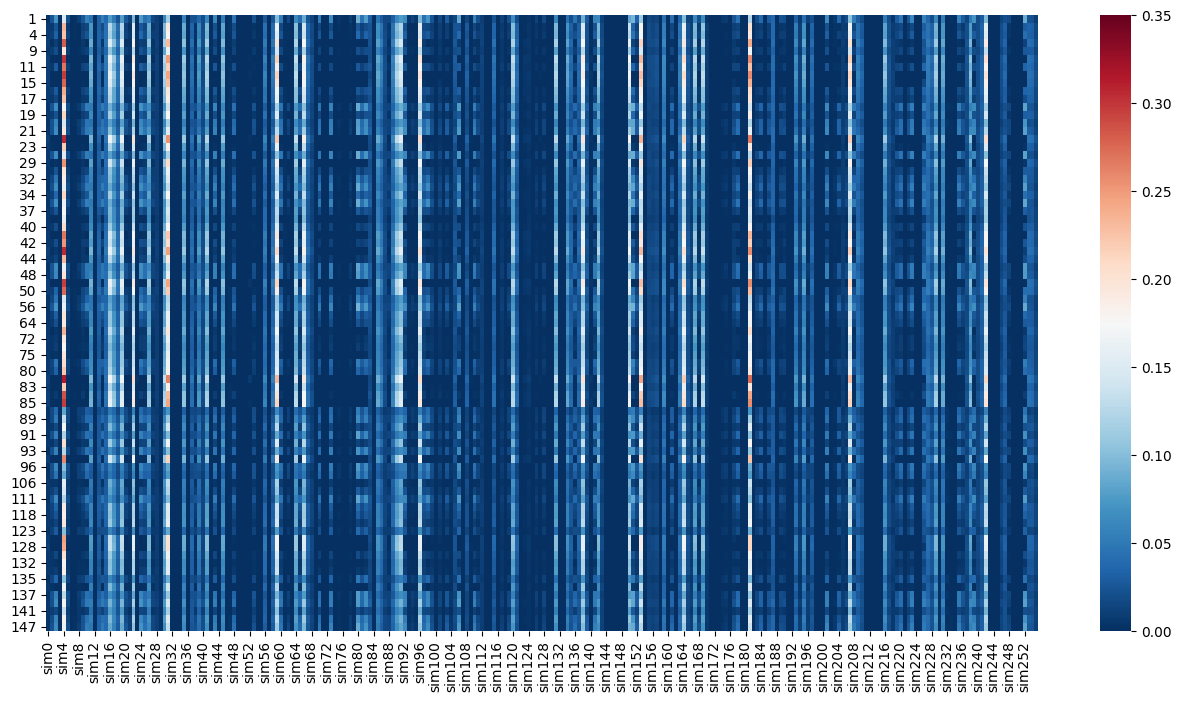

In [75]:
sns.set_context({"figure.figsize":(16,8)})
neg_embedding  = eval_res[eval_res.pred == 0].iloc[:, 6:]
print(f"min value: {neg_embedding.min().min()}")
print(f"max value: {neg_embedding.max().max()}")

sns.heatmap(data=neg_embedding,square=False, cmap="RdBu_r", vmax=0.35, vmin=0.0) 


min value: 0.0
max value: 0.31484503


<Axes: >

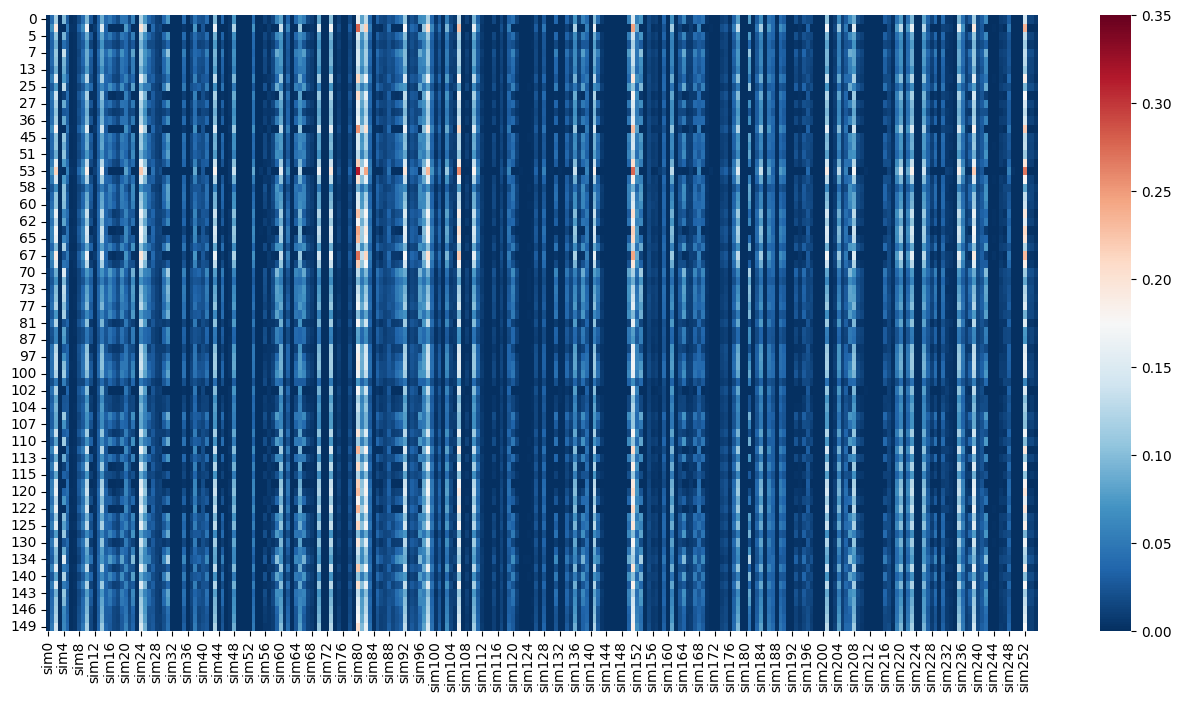

In [76]:
sns.set_context({"figure.figsize":(16,8)})
pos_embedding  = eval_res[eval_res.pred == 1].iloc[:, 6:]
print(f"min value: {pos_embedding.min().min()}")
print(f"max value: {pos_embedding.max().max()}")

sns.heatmap(data=pos_embedding,square=False, cmap="RdBu_r", vmax=0.35, vmin=0.0) 


### 下面这个是transformer的最后cls_token特征拿出来，进行分析

In [142]:
exp_name = "new_Transformer"

tidx = 0
eval_res = pd.read_csv(os.path.join(root_path, exp_name, f"time{tidx}/eval_HEROHE_test_res.csv"))
eval_res

,Unnamed: 0,slide_id,prob_neg,prob_pos,pred,label,sim0,sim1,sim2,sim3,...,sim246,sim247,sim248,sim249,sim250,sim251,sim252,sim253,sim254,sim255
0,0,70,0.408169,0.591831,1,1,-0.229523,-1.202269,0.828614,-0.514677,...,-0.228668,0.018743,-0.243132,1.535339,0.194021,-0.186607,-0.437070,-0.988665,-0.013807,2.619522
1,1,71,0.645698,0.354302,0,1,-0.232722,-1.092153,0.880333,-0.358606,...,-0.162304,-0.077875,-0.471322,1.653136,0.436947,0.189108,-0.217081,-1.053709,-0.211904,2.438331
2,2,72,0.096587,0.903413,1,1,-0.115803,-1.273553,0.712421,-0.644300,...,-0.176167,-0.089065,-0.308481,1.558179,0.153735,-0.360706,-0.575530,-1.173538,0.296690,2.738534
3,3,73,0.838773,0.161227,0,1,-0.464178,-1.293738,0.905926,-0.462411,...,0.088837,0.112244,-0.297958,1.525980,0.331423,0.051165,-0.346304,-0.559580,-0.228970,2.646797
4,4,74,0.683378,0.316622,0,1,-0.465862,-1.091042,0.748457,-0.482751,...,-0.065938,-0.000365,-0.363608,1.731794,0.425092,0.252657,-0.355278,-0.902403,-0.175397,2.541858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,145,347,0.838161,0.161839,0,1,-0.230113,-1.142777,0.880855,-0.671702,...,0.125820,0.115624,-0.400134,1.411322,0.637181,-0.455584,-0.174600,-0.853487,-0.203223,2.393653
146,146,348,0.322004,0.677996,1,1,-0.216897,-1.109098,0.864275,-0.625833,...,-0.041298,-0.047701,-0.261581,1.546842,0.313236,-0.198228,-0.482387,-0.837512,0.158357,2.526124
147,147,349,0.813872,0.186128,0,1,-0.295913,-1.098058,0.962431,-0.540541,...,0.016719,0.063255,-0.308248,1.543372,0.453772,-0.117043,-0.289618,-0.671512,-0.186872,2.289966
148,148,350,0.252083,0.747917,1,1,-0.095960,-1.151268,0.966086,-0.601636,...,-0.079965,-0.020978,-0.349545,1.617766,0.381521,-0.256326,-0.346214,-0.856617,0.013420,2.460125


/tmp/ipykernel_490729/2688707968.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data, x='x', y='value', palette="flare")


<Axes: xlabel='x', ylabel='value'>

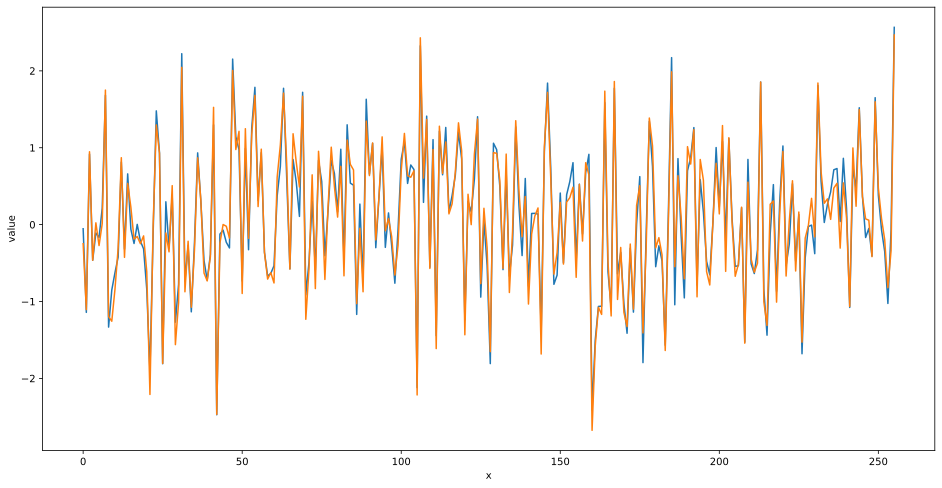

In [143]:
columns = [f"sample{i}" for i in eval_res['slide_id']]
sns.set_context({"figure.figsize":(16,8)})

prototype_sim_len = eval_res.shape[1]-6

data = pd.DataFrame(eval_res[eval_res.pred == 1].iloc[:, 6:])
# data.rename(columns=dict(columns))

data = pd.DataFrame(data.mean(), columns=['value'])
data.insert(loc=0, column='x', value=list(range(prototype_sim_len)))
data
sns.lineplot(data=data, x='x', y='value', palette="flare")

data = pd.DataFrame(eval_res[eval_res.pred == 0].iloc[:, 6:])

data = pd.DataFrame(data.mean(), columns=['value'])
data.insert(loc=0, column='x', value=list(range(prototype_sim_len)))
data
sns.lineplot(data=data, x='x', y='value')
# sns.histplot(eval_res[eval_res.pred == 1].iloc[:, 6:])

2.9812984
-3.053052
         Falling back to preprocessing with `sc.pp.pca` and default params.


/home/cyyan/anaconda3/envs/torch20/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


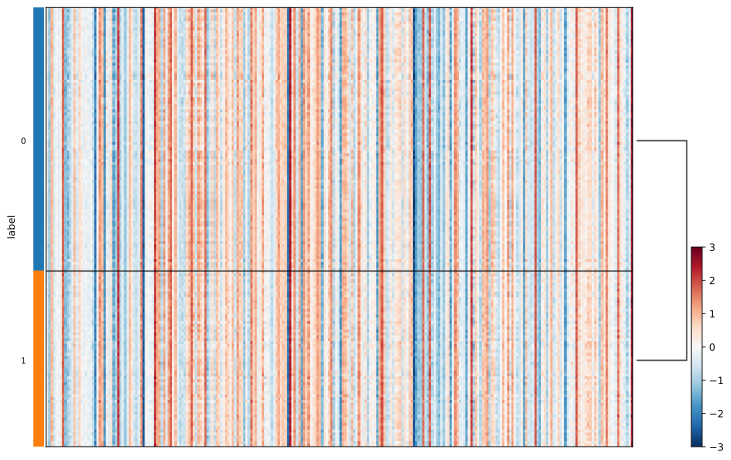

In [144]:
eval_res["label"] = pd.Categorical(eval_res["label"])
eval_res["pred"] = pd.Categorical(eval_res["pred"])

adata = sc.AnnData(eval_res.iloc[:, 6:], obs=pd.DataFrame(eval_res.iloc[:, 1:6]))

# pred = eval_res.iloc[:, 4]

print(adata.X.max())
print(adata.X.min())

ax = sc.pl.heatmap(adata, adata.var_names, groupby='label', layer=None, standard_scale=None,
                   vmin=-3, vmax=3, cmap='RdBu_r', dendrogram=True, swap_axes=False, figsize=(12, 8))


min value: -3.053052
max value: 2.7581036


<Axes: >

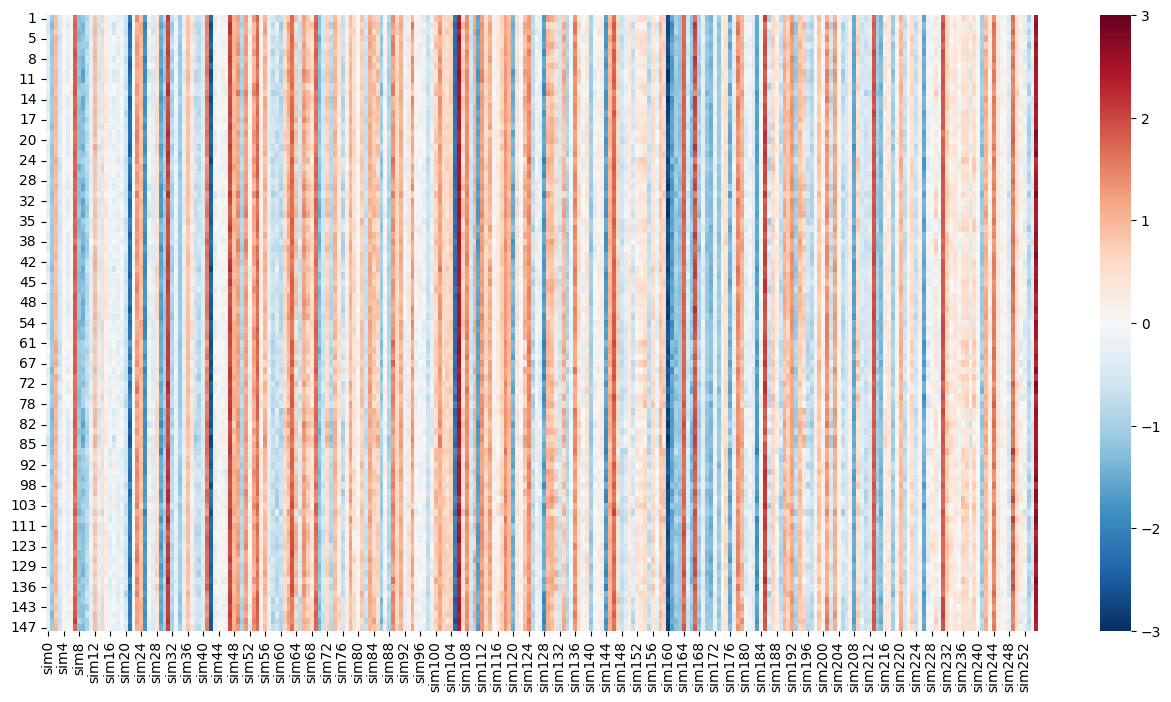

In [85]:
sns.set_context({"figure.figsize":(16,8)})
neg_embedding  = eval_res[eval_res.pred == 0].iloc[:, 6:]
print(f"min value: {neg_embedding.min().min()}")
print(f"max value: {neg_embedding.max().max()}")

sns.heatmap(data=neg_embedding,square=False, cmap="RdBu_r", vmax=3, vmin=-3) 


min value: -2.8067045
max value: 2.9812984


<Axes: >

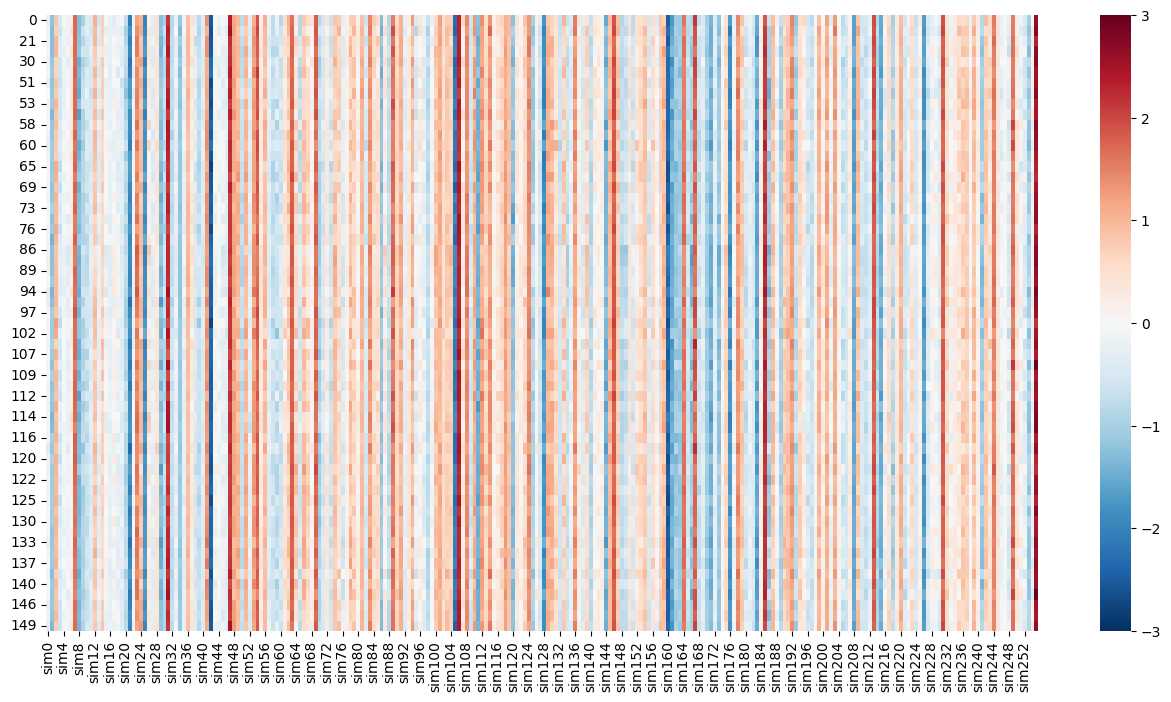

In [116]:
sns.set_context({"figure.figsize":(16,8)})
pos_embedding  = eval_res[eval_res.pred == 1].iloc[:, 6:]
print(f"min value: {pos_embedding.min().min()}")
print(f"max value: {pos_embedding.max().max()}")

sns.heatmap(data=pos_embedding,square=False, cmap="RdBu_r", vmax=3, vmin=-3) 


### 下面这个是CLAM的最后cls_token特征拿出来，进行分析

In [128]:
exp_name = "new_CLAM_8"

tidx = 0
eval_res = pd.read_csv(os.path.join(root_path, exp_name, f"time{tidx}/eval_HEROHE_test_res.csv"))
eval_res

,Unnamed: 0,slide_id,prob_neg,prob_pos,pred,label,sim0,sim1,sim2,sim3,...,sim246,sim247,sim248,sim249,sim250,sim251,sim252,sim253,sim254,sim255
0,0,70,0.406639,0.593361,[1],1,0.0,0.110138,0.000015,0.003551,...,0.000011,0.0,0.121081,0.083266,0.035292,2.883421e-07,8.438719e-06,0.000005,0.0,0.057833
1,1,71,0.475388,0.524612,[1],1,0.0,0.056287,0.000006,0.001116,...,0.000006,0.0,0.087031,0.109873,0.064595,0.000000e+00,0.000000e+00,0.000002,0.0,0.082986
2,2,72,0.185922,0.814078,[1],1,0.0,0.061684,0.000019,0.004131,...,0.000013,0.0,0.192389,0.147000,0.043901,2.238000e-06,1.174369e-05,0.000003,0.0,0.030143
3,3,73,0.644867,0.355133,[0],1,0.0,0.153706,0.000013,0.003097,...,0.000007,0.0,0.063048,0.035832,0.035193,0.000000e+00,5.368169e-06,0.000005,0.0,0.080049
4,4,74,0.510676,0.489324,[0],1,0.0,0.092971,0.000010,0.001990,...,0.000006,0.0,0.085875,0.087155,0.055554,0.000000e+00,0.000000e+00,0.000004,0.0,0.081730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,145,347,0.332147,0.667852,[1],1,0.0,0.108479,0.000017,0.003906,...,0.000012,0.0,0.145980,0.089835,0.045701,2.052043e-07,8.900905e-06,0.000004,0.0,0.055054
146,146,348,0.331369,0.668631,[1],1,0.0,0.066720,0.000013,0.002624,...,0.000009,0.0,0.132359,0.122492,0.053978,0.000000e+00,1.623885e-07,0.000003,0.0,0.059486
147,147,349,0.457806,0.542194,[1],1,0.0,0.112095,0.000014,0.003073,...,0.000010,0.0,0.108370,0.075042,0.040937,0.000000e+00,6.179418e-06,0.000003,0.0,0.065669
148,148,350,0.358485,0.641515,[1],1,0.0,0.066687,0.000012,0.002341,...,0.000009,0.0,0.126215,0.116661,0.052549,0.000000e+00,0.000000e+00,0.000002,0.0,0.064264


/tmp/ipykernel_490729/2688707968.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data, x='x', y='value', palette="flare")


KeyError: 'y'

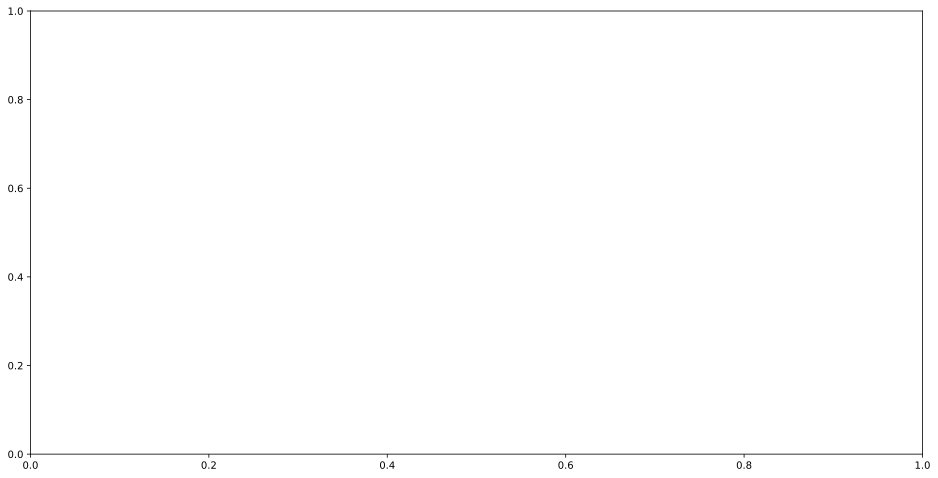

In [129]:
columns = [f"sample{i}" for i in eval_res['slide_id']]
sns.set_context({"figure.figsize":(16,8)})

prototype_sim_len = eval_res.shape[1]-6

data = pd.DataFrame(eval_res[eval_res.pred == 1].iloc[:, 6:])
# data.rename(columns=dict(columns))

data = pd.DataFrame(data.mean(), columns=['value'])
data.insert(loc=0, column='x', value=list(range(prototype_sim_len)))
data
sns.lineplot(data=data, x='x', y='value', palette="flare")

data = pd.DataFrame(eval_res[eval_res.pred == 0].iloc[:, 6:])

data = pd.DataFrame(data.mean(), columns=['value'])
data.insert(loc=0, column='x', value=list(range(prototype_sim_len)))
data
sns.lineplot(data=data, x='x', y='value')
# sns.histplot(eval_res[eval_res.pred == 1].iloc[:, 6:])

0.29868305
0.0
         Falling back to preprocessing with `sc.pp.pca` and default params.


/home/cyyan/anaconda3/envs/torch20/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


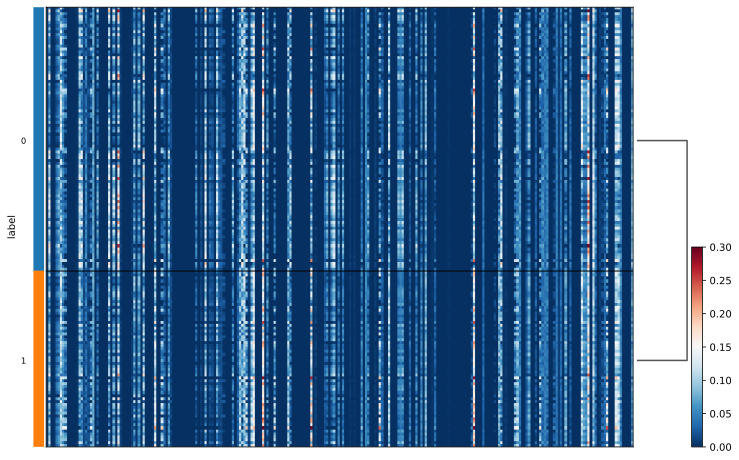

In [140]:
eval_res["label"] = pd.Categorical(eval_res["label"])
eval_res["pred"] = pd.Categorical(eval_res["pred"])

adata = sc.AnnData(eval_res.iloc[:, 6:], obs=pd.DataFrame(eval_res.iloc[:, 1:6]))

# pred = eval_res.iloc[:, 4]

print(adata.X.max())
print(adata.X.min())

ax = sc.pl.heatmap(adata, adata.var_names, groupby='label', layer=None, standard_scale=None,
                   vmin=0, vmax=0.3, cmap='RdBu_r', dendrogram=True, swap_axes=False, figsize=(12, 8))


#### 下面是画2d的KDE图，对于每个similarity

/home/cyyan/anaconda3/envs/torch20/lib/python3.8/site-packages/seaborn/axisgrid.py:1690: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f = plt.figure(figsize=(height, height))


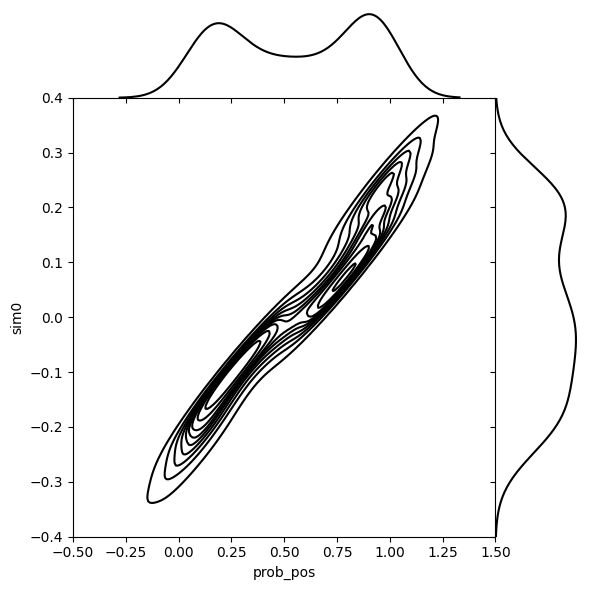

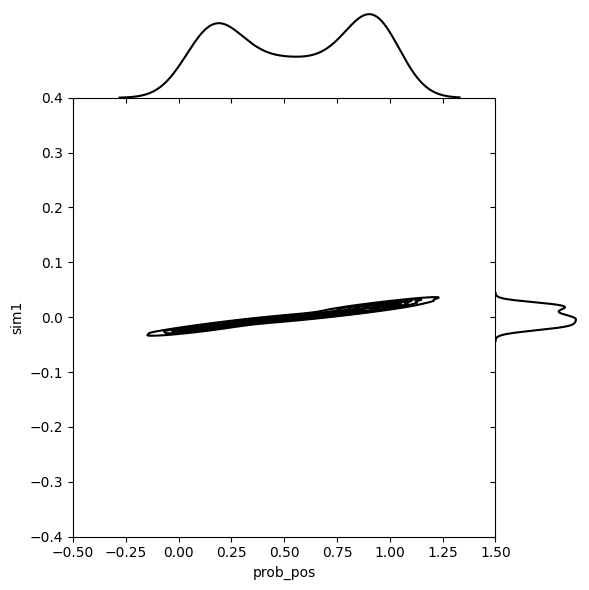

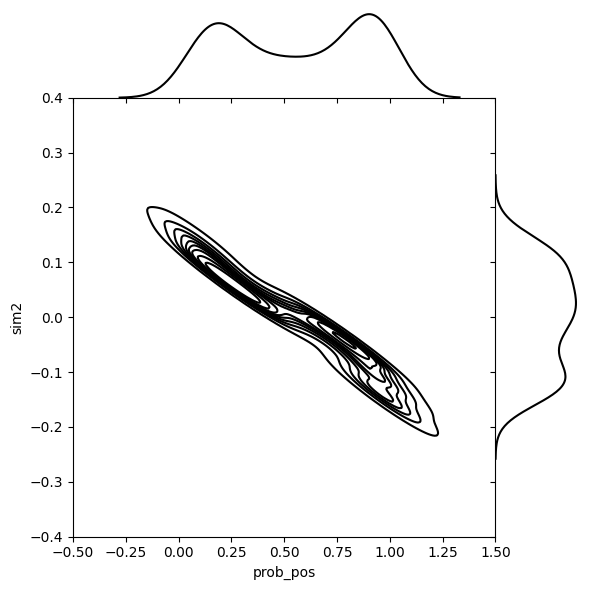

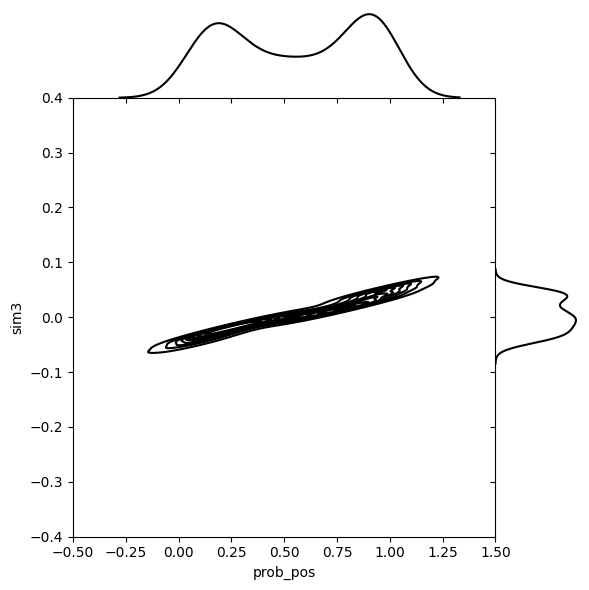

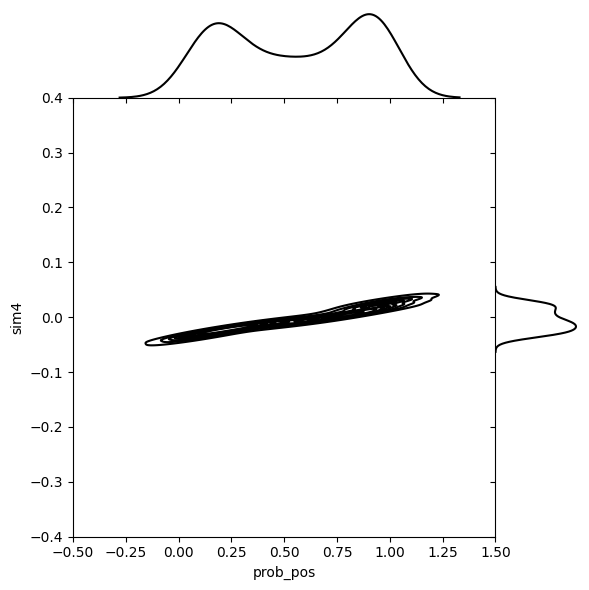

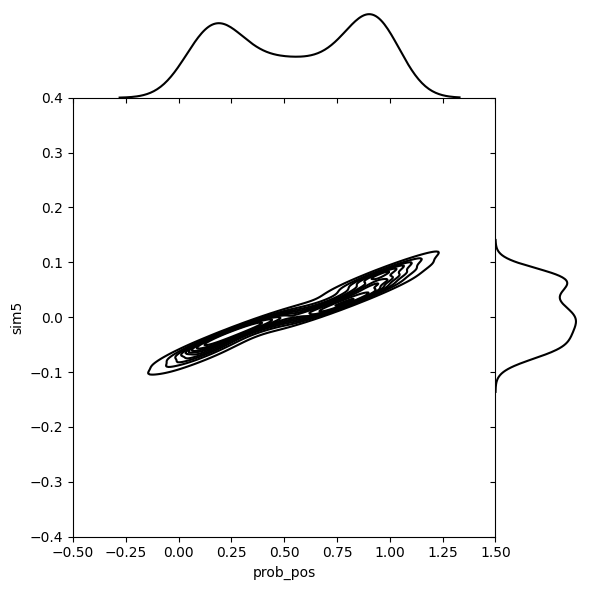

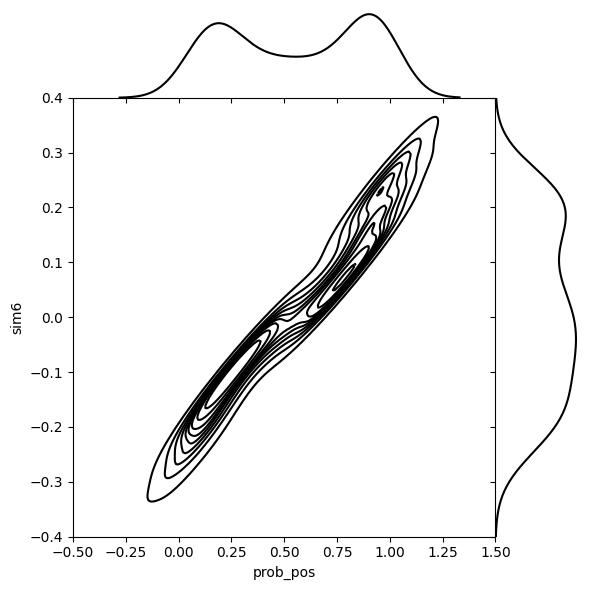

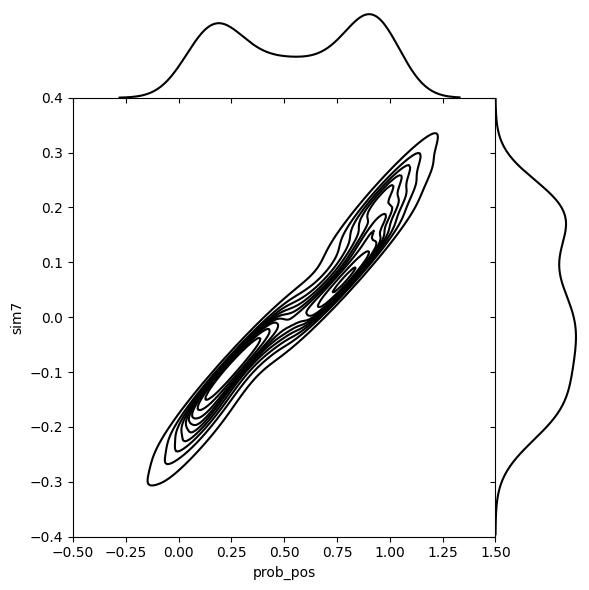

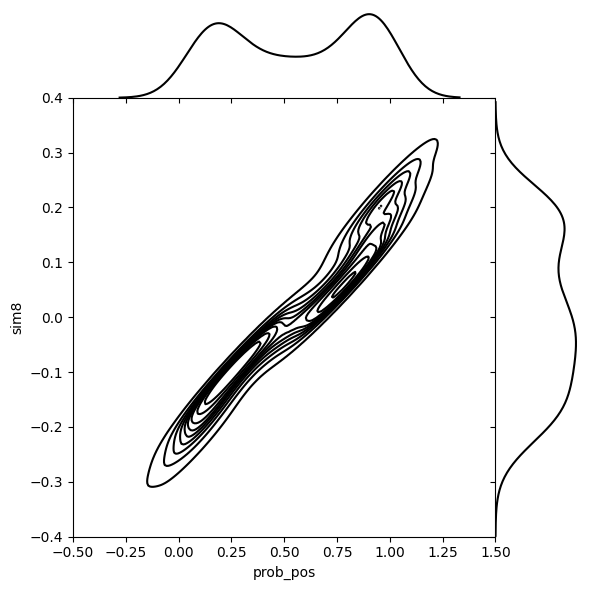

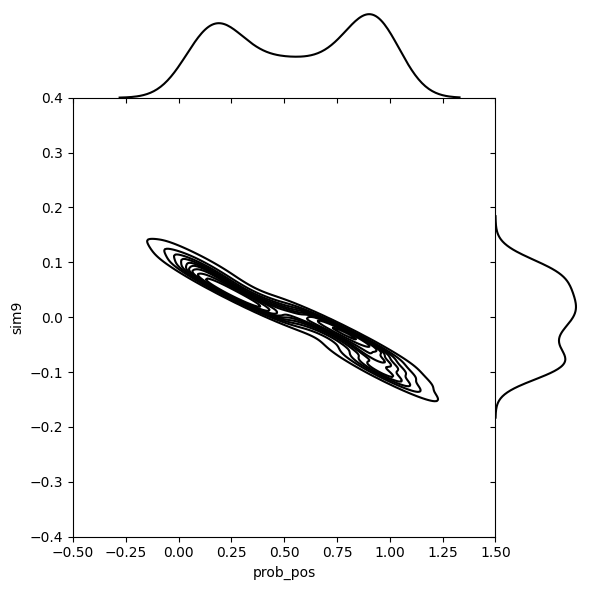

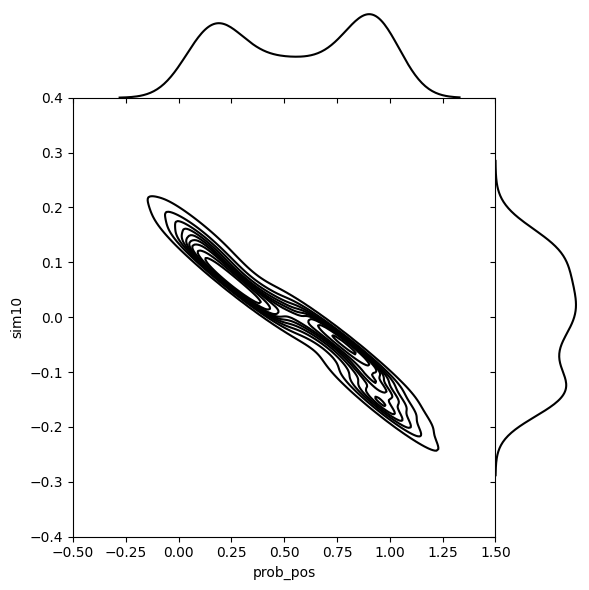

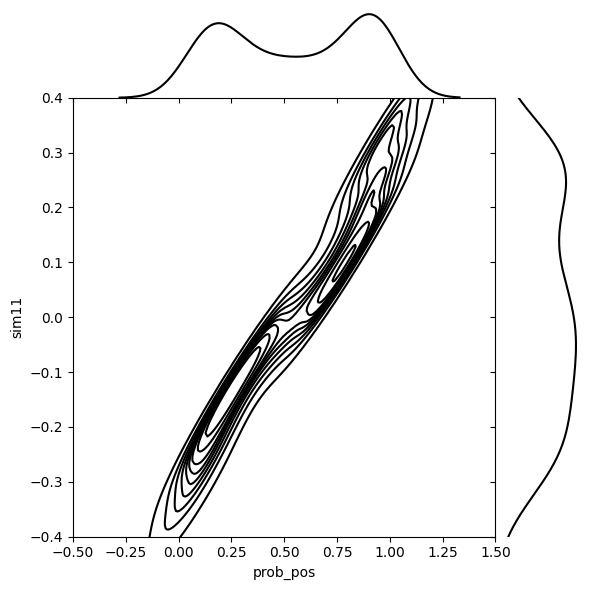

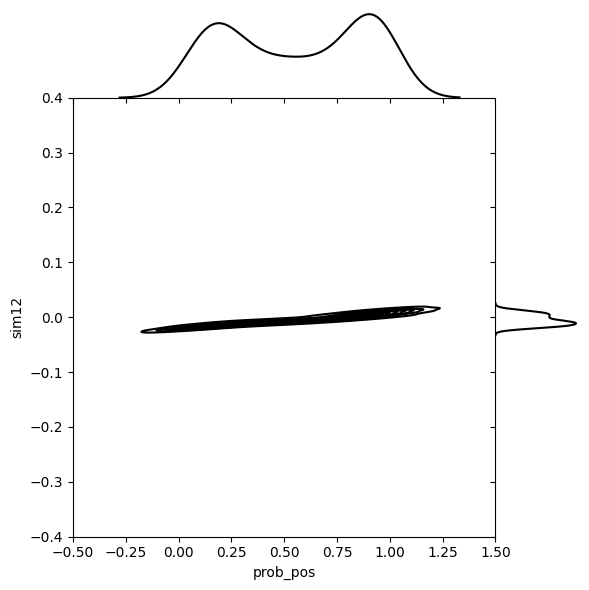

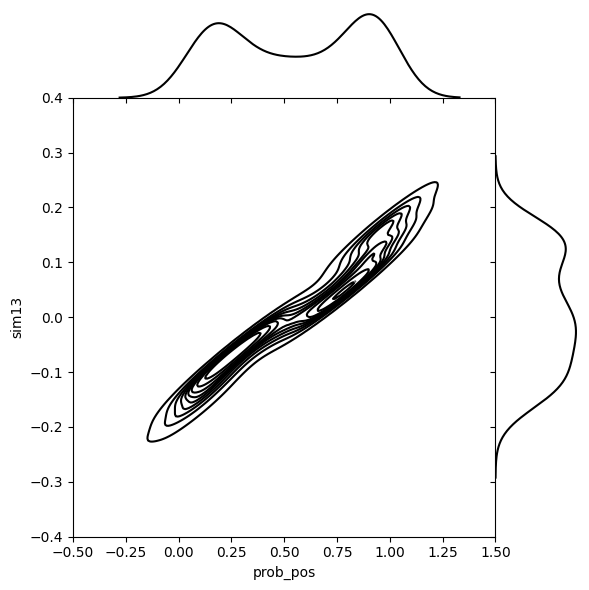

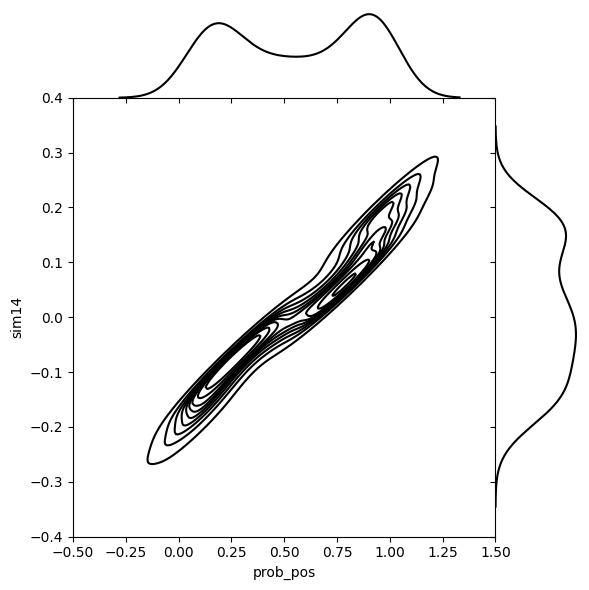

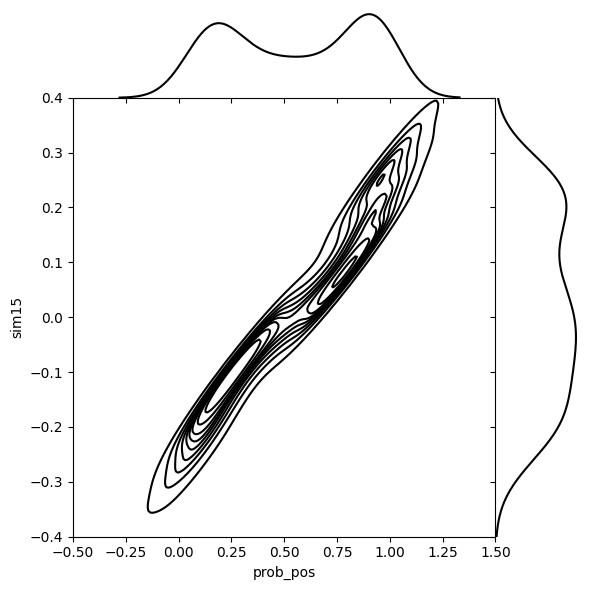

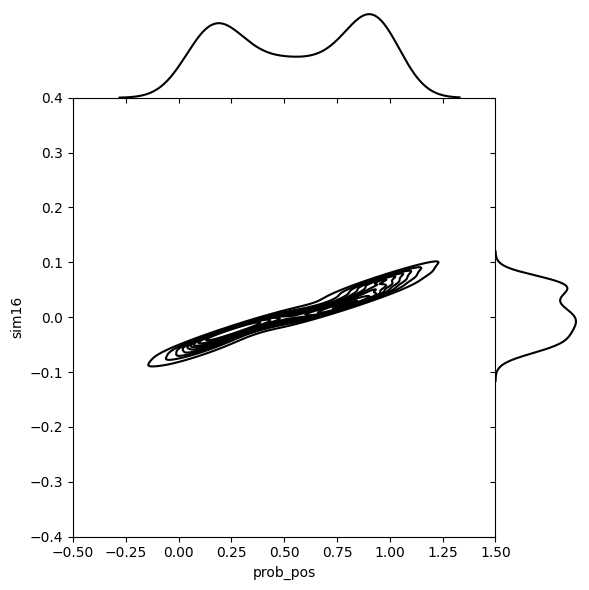

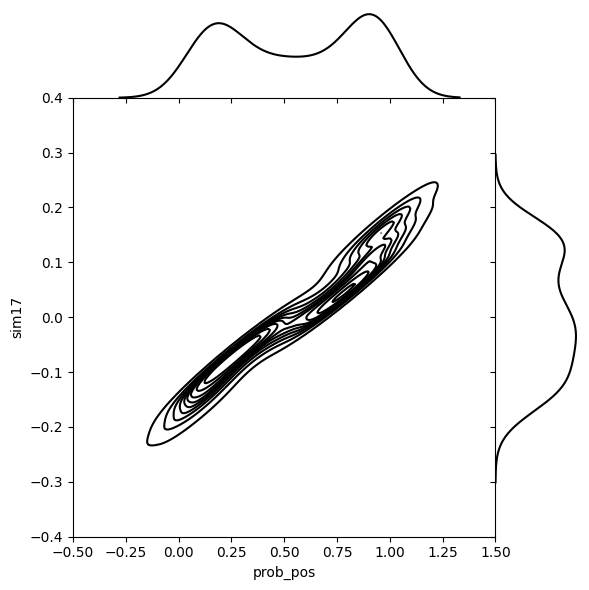

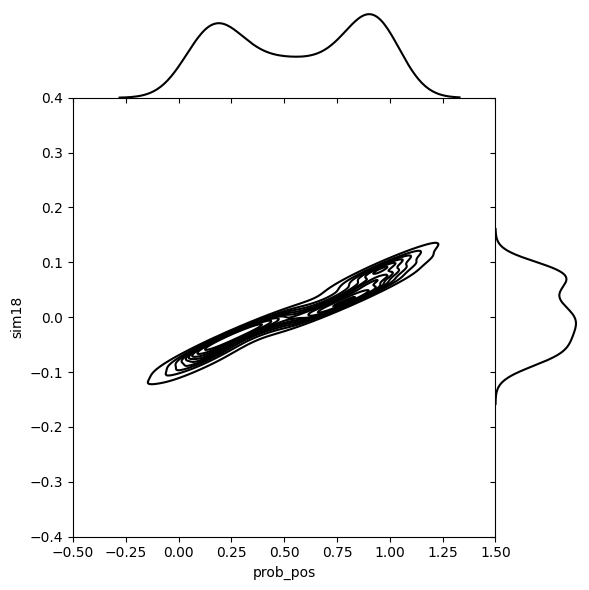

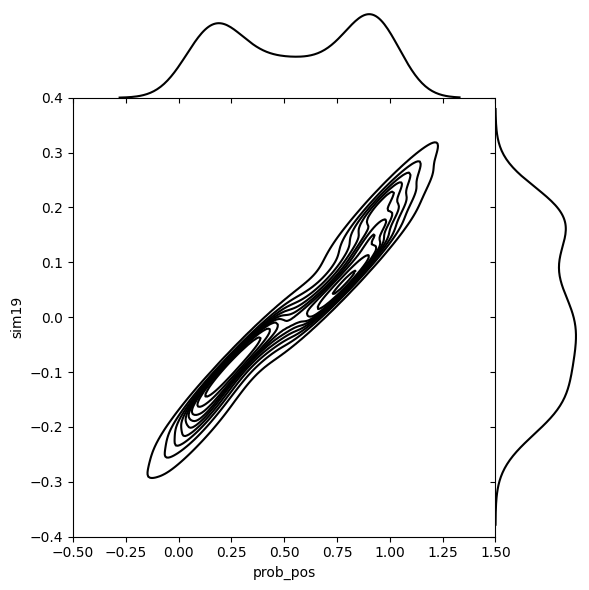

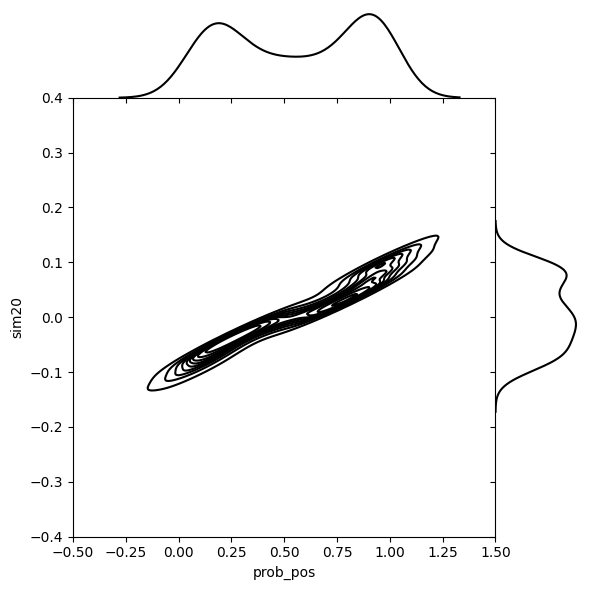

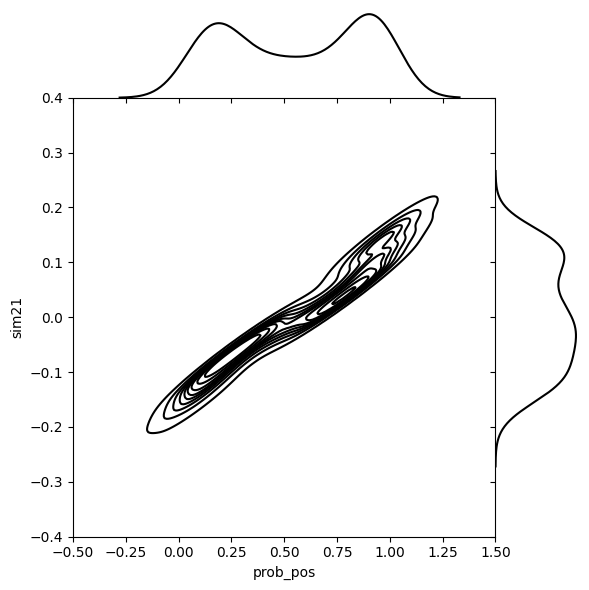

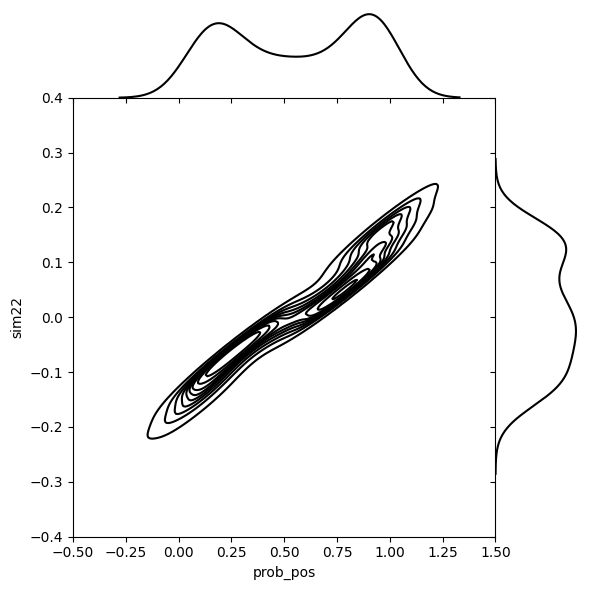

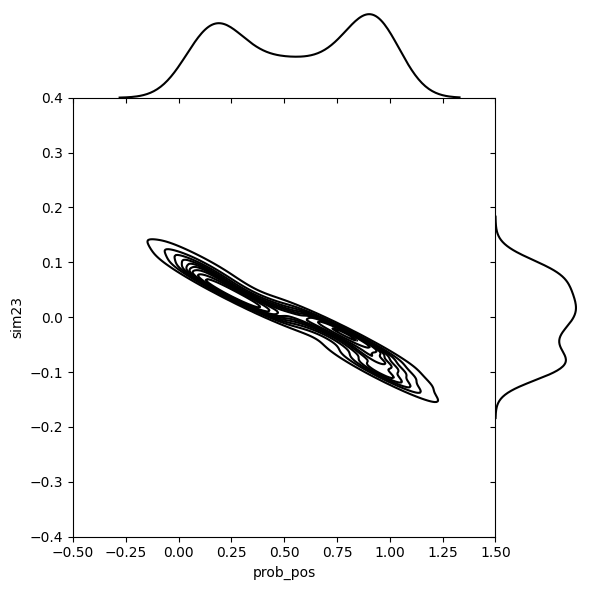

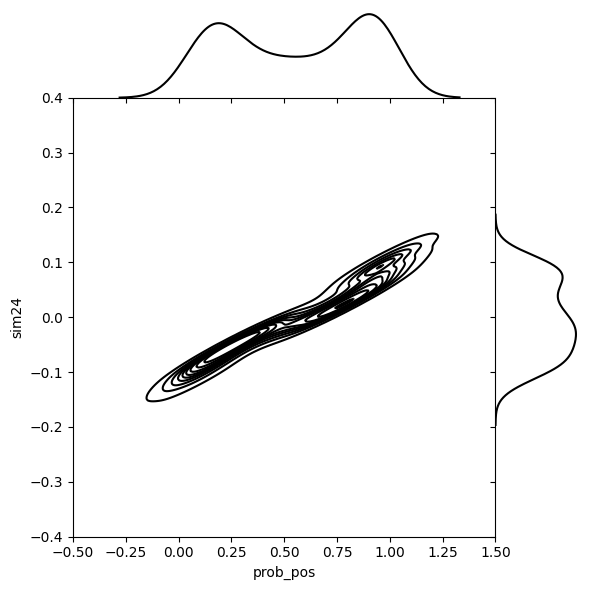

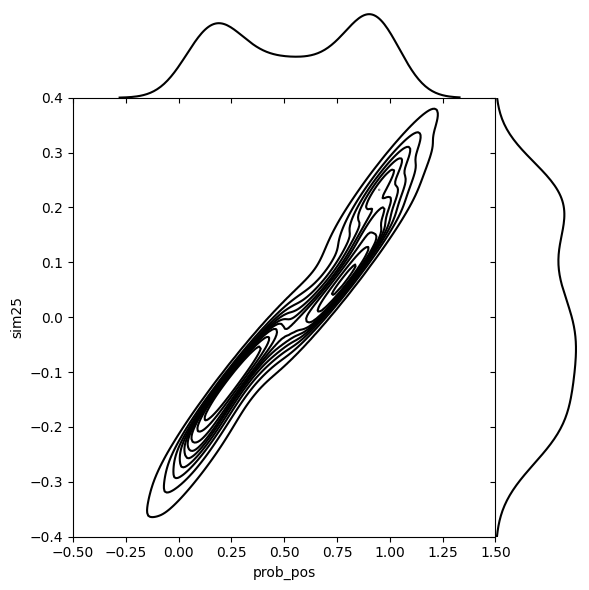

In [79]:
for idx in range(26):
    # eval_res[f"sim{idx}"] = (eval_res[f"sim{idx}"] - eval_res[f"sim{idx}"].min()) / (eval_res[f"sim{idx}"].max() - eval_res[f"sim{idx}"].min())
    fig = sns.jointplot(x=eval_res["prob_pos"], y=eval_res[f"sim{idx}"], kind="kde", 
                color="#000000", space=0,
                xlim=[-0.5,1.5], ylim=[-0.4, 0.4])
    # plot = fig.get_figure()
    # plt.show()
    fig.savefig(f"/home/cyyan/Projects/HER2proj/post_results/kde_sim{idx}.svg", dpi=400)
